In [1]:
import sys
sys.path.append('..')
import nbimport 
nbimport.initialize()

In [2]:
from Stat_15 import *
css_styling()

# Binned maximum likelihood estimates 

# Maksimale sandsynlighedsestimater i bøtter

## Purpose 

- To expand the idea of Maximum Likelihood Estimates (MLE) to apply to _binned_ data (e.g., histogrammed data)
- To understand the differences between a binned MLE and a regular MLE

## Formål

- For at udvide ideen om estimater for maksimal sandsynlighed (MLE) til at gælde for data i bøtter (f.eks. histogrameret data)
- At forstå forskellene mellem en MLE i bøtter og en almindelig MLE

## Motivation

## Motivation

Maximum likelihood estimation (see [here](#Maximum-likelihood-estimate-(MLE)) (MLE) of parameters is, as we've seen earlier, a robust method for estimating parameters $\theta$.  The MLE method is however, not guarantied to succeed.  It is also important to note that the likelihood 

Maksimal sandsynlighedsestimering (see [here](#Maksimale-sandsynligheds-estimat-(MLE)) (MLE) af parametre er, som vi har set tidligere, en robust metode til at estimere parametre $\theta$. MLE-metoden garantere dog ikke at det lykkes. Det er vigtigt at bemærke, at sandsynligheden

$$\mathcal{L}(x|\hat\theta) = \prod_{i=1}^{N}f(x_i)\quad,$$ 

is a function of the sample $x$.  We've seen that to estimate the $\hat\theta$ with $\mathcal{L}(x|\hat\theta)$, we can find the minimum of the negative _logarithmic_ likelihood 

er en funktion af prøven $x$. Vi har set, at for at estimere $\hat\theta$ med $\mathcal{L}(x|\hat\theta)$, kan vi finde minimum af den negative _logaritmiske_ sandsynlighed

$$-\ell(x|\hat\theta) = -\log\mathcal{L}(x|\hat\theta)=-\sum_{i=1}^{N}\log f(x_i,\hat\theta)\quad.$$ 

This requires evaluation of the _probability density function_ ($f$) over the sample 

Dette kræver evaluering af _sandsynlighedsfordelingen_ ($f$) over prøven

$$x=\{x_i\,|\,i=1,\ldots,N\}\quad.$$ 

However, often our data is _not_ given as individual observations $x_i$, but rather as the prevalence of observations $b_i < x < b_{i+1}$ i.e., _binned data_, e.g., a _histogram_ (see [here](#Histograms-and-distributions)).

The reasons for binned data are multitude. 

- The data sample could be so large that storing all observations becomes impractical. 
- The measuring equipment may report measurements in _bins_ - not as a continuous distribution. 
- And other reasons. 

Ofte er vores data _ikke_ givet som individuelle observationer $x_i$, men snarere som forekomsten af observationer $b_i < x < b_{i+1}$, dvs. _data i bøtter_, fx et _histogram_ (se [her](#Histogrammer-og-fordelinger)).

Der er mange gode grunde til at bruge data i bøtter

- Dataprøven kan være så stor, at lagring af alle observationer bliver upraktisk.
- Måleudstyret kan rapportere målinger i _bøtter_ - ikke som en kontinuerlig distribution.
- Og andre grunde.

If our data sample is binned 

Hvis vores dataprøve er i bøtter

$$X=\left\{(i,n_i)\,\middle|\,i=1,\ldots,N\ n_i = \sum_{x_i\in[b_{i},b_{i+1})}\right\}\quad,$$

where $i$ is the _bin number_, and $n_i$ is the number of observations that fall into the bin given by the bin boundaries 

$$[b_{i},b_{i+1})\quad,$$

we can still formulate a maximum likelihood estimate.   

hvor $i$ er _bøttenummeret_, og $n_i$ er antallet af observationer, der falder i bøtten givet ved grænserne

$$[b_{i},b_{i+1})\quad,$$

kan vi stadig formulere et estimat for maksimal sandsynlighed.

## Binomial and multinomial distributions

First, let us consider a set of single observations where the outcome is either success or failure, and where the probability of success in each observation is $p$.   The number experiments, each of size $N$, with exactly $n$ success is given by the [binomial coefficient](https://en.wikipedia.org/wiki/Binomial_coefficient)

## Binomial og multinomial distribution

Lad os først overveje et sæt enkeltobservationer, hvor resultatet enten er succes eller fiasko, og hvor sandsynligheden for succes i hver observation er $p$. Antallet af eksperimenter, hver med størrelse $N$, med nøjagtig $n$-successer er givet ved [binomial koefficienten](https://en.wikipedia.org/wiki/Binomial_coefficient)

$$\binom{N}{n} = \frac{N!}{n!(N-n)!}\quad,$$

while the probability of $n$ success and $N-n$ failures are given by $p^n$ and $(1-p)^{N-n}$, and thus we find the _Probability Mass Function_ (PMF) 

mens sandsynligheden for $n$-successer og $N-n$ fiasker er givet af henholdsvis $p^n$ og $(1-p)^{N-n}$, og vi  finder _sandsynlighedsfordelingen_ (PMF)

$$f(n;N,p) = \binom{N}{n}p^n (1-p)^{N-n} = \frac{N!}{n!(N-n)!}p^n(1-p)^{N-n}\quad,$$ 

known as the _binomial distribution_. 

kendt som _binomial fordelingen_.

Now, let us consider a set of observations where each outcome is one of $m$ discrete possibilities.  We will label each possibility by a subscript e.g., ${}_{i}$, with probability $p_i$.   Clearly, 

Lad os nu overveje et sæt observationer, hvor hvert resultat er en af $m$ diskrete muligheder. Vi markerer hver mulighed ved hjælp af et indeks, for eksempel ${}_{i}$, med sandsynlighed $p_i$. Det er klart at 

$$\sum_{i=1}^{m}p_i = 1\quad,$$ 

as the outcomes _must_ be one of the $m$ possibilities.  Consider experiments of $N$ observations which has a particular set of outcomes given by the prevalence of the possible outcomes 

da resultaterne _skal_ være en af de $m$ muligheder. Overvej eksperimenter med $N$-observationer, der har et bestemt sæt af resultater givet ved antallet af de mulige udfald

$$\left\{n_1,\ldots,n_m\,\middle|\,\sum_{i=1}^{m}n_i = N\right\}\quad,$$ 

that is $n_i$ is the number of times (out of $N$) where we had the outcome ${}_{i}$.  The number of such possible experiments is given by the [_multinomial coefficient_](https://en.wikipedia.org/wiki/Multinomial_theorem#Multinomial_coefficients)

hvor $n_i$ er antallet af gange (ud af $N$), hvor vi fandt udfaldet ${}_{i}$. Antallet af sådanne mulige eksperimenter er angivet ved [_multinomial koefficienten_](https://da.wikipedia.org/wiki/Multinomial_teorem#Multinomial_koefficienter)

$$\binom{N}{n_1,\ldots,n_m} = \frac{N!}{n_1!\cdots n_m!} = \frac{N!}{\prod_{i=1}^{m} n_i!}\quad.$$

The probability for the particular outcome given above is simply $\prod_{i=1}^{m}p_i^{n_i}$, and thus we find the [_multinomial_](https://en.wikipedia.org/wiki/Multinomial_distribution) probability mass function 

Sandsynligheden for de specifikke udfald, der er givet ovenfor, er $\prod_{i=1}^{m}p_i^{n_i}$, og vi finder således [_multinomial sandsynlighedsfordeling_](https://en.wikipedia.org/wiki/Multinomial_distribution)

$$f(n_1,\ldots,n_m;p_1,\ldots,p_m) = \binom{N}{n_1,\ldots,n_m}\prod_{i=1}^{m} p_i^{n_i}
= \frac{N!}{\prod_{i=1}^{m} n_i!}\prod_{i=1}^m p_i^{n_i} 
= \frac{N!}{n_1!\cdots n_m!}\left(p_1^{n_1}\cdots p_m^{n_m}\right)\quad.$$ 

It is easy to see how this distribution relates to binned data:  We have $m$ bins, corresponding to our $m$ possible outcomes.  The probability of an observation landing in bin $i$ is given by $p_i$.  Thus, the probability of a binned data set is given by the multinomial PMF. 

Det er let at se, hvordan denne distribution forholder sig til data i bøtter: Vi har $m$ bøtter, svarende til vores $m$ mulige udfald. Sandsynligheden for en observations lander i bøtten $i$ er givet af $p_i$. Således er sandsynligheden for et datasæt i bøtter givet ved den multinomialle PMF.

## Back to likelihood 

From the above considerations on the multinomial distribution, it is easy to see that the likelihood of a given binned sample 

$$n_i = \frac{\Delta N_i}{\Delta x_i} N\quad,$$

is given by 

## Tilbage til sandsynligheden

Ud fra ovenstående betragtninger om den multinomiale fordeling er det let at se, at sandsynligheden for en given prøve i bøtter

$$n_i = \frac{\Delta N_i}{\Delta x_i} N\quad,$$

er givet ved

In [3]:
from sympy import symbols, Product, Sum, IndexedBase, factorial, Eq, Function
i,m  = symbols('i m',integer=True,positive=True)
n    = IndexedBase('n',integer=True,positive=True)
p    = IndexedBase('p',real=True,nonnegative=True)
N    = symbols('N',integer=True,positive=True)
L    = factorial(N)/Product(factorial(n[i]),(i,1,m))*Product(p[i]**n[i],(i,1,m))
Ln   = Function('Lcal_B^m',real=True,positive=True)(n,p)
Eq(Ln,L)

Eq(Lcal_B^m(n, p), factorial(N)*Product(p[i]**n[i], (i, 1, m))/Product(factorial(n[i]), (i, 1, m)))

with the logarithmic likelihood given by 

med den logaritmiske sandsynlighed givet ved

In [4]:
from sympy import log as sylog 
elln = Function('ell_B^m',real=True,positive=True)(n,p)
ell  = sylog(L).expand(log=True,force=True)
Eq(elln,ell)

Eq(ell_B^m(n, p), log(factorial(N)) + Sum(log(p[i])*n[i], (i, 1, m)) - Sum(log(factorial(n[i])), (i, 1, m)))

Here, the probabilities $p_i$ are given by some PDF $f$.  In particular, if our binned observation $x$ fall in the bins 

$$[b_{i},b{i+1})\quad,$$ 

then 

Her er sandsynlighederne $p_i$ givet af en PDF $f$. Især hvis vores observationer $x$ falder i bøtten

$$[b_{i},b{i+1})\quad,$$

så har vi

In [5]:
from sympy import Integral, UnevaluatedExpr
b          = IndexedBase('b',real=True)
Phi        = Function('Phi',real=True,positive=True)
x,thetahat = symbols('x thetahat',real=True)
f          = Function('f',real=True,positive=True)
F          = Function('F',real=True,positive=True)
Eq(UnevaluatedExpr(Eq(p[i],Phi(i,thetahat))),
   UnevaluatedExpr(Eq(Integral(f(x,thetahat),(x,b[i],b[i+1])),
                      F(b[i+1],thetahat)-F(b[i],thetahat))))

Eq(Eq(p[i], Phi(i, thetahat)), Eq(Integral(f(x, thetahat), (x, b[i], b[i + 1])), F(b[i + 1], thetahat) - F(b[i], thetahat)))

where $F$ is the Cumulative Density Function (see [here](#CDF)), and we get 

hvor $F$ er komulative tæthedsfunktion (se [her](#CDF)), og vi får

In [6]:
Lnt = Ln.replace(p,thetahat)
Lt  = L.replace(p[i],Phi(i,thetahat))
Eq(Lnt,Lt)

Eq(Lcal_B^m(n, thetahat), factorial(N)*Product(Phi(i, thetahat)**n[i], (i, 1, m))/Product(factorial(n[i]), (i, 1, m)))

for the likelihood dependent on the estimated parameters, and 

for sandsynligheden afhængig af de estimerede parametre, og

In [7]:
from sympy import Wild, gamma
ellnt = elln.replace(p,thetahat)
ellt  = ell.replace(p[i],Phi(i,thetahat))
w     = Wild('w')
CB    = (ellt - Sum(sylog(Phi(i,thetahat))*n[i],(i,1,m)))\
        .simplify().replace(factorial(w),gamma(w+1))
Eq(ellnt,ellt)

Eq(ell_B^m(n, thetahat), log(factorial(N)) + Sum(log(Phi(i, thetahat))*n[i], (i, 1, m)) - Sum(log(factorial(n[i])), (i, 1, m)))

for the logarithm of the likelihood. 

for logaritmen af sandsynligheden.

Note, in the above $n_i$ - the number of counts in bin ${}_{i}$ - and $N=\sum_{i=1}^{m}$ - the total number of counts, are constant with respect the the estimated parameters $\hat\theta$.   In principle we can therefor drop the terms $\log(N!)$ and $\sum_{i=1}^{m}\log(n_i!)$ when minimising $\ell$

Bemærk, $n_i$ ovenover - antallet af tællinger i bøtten ${}_{i}$ - og $N=\sum_{i=1}^{m}$ - det samlede antal tællinger, er konstante med hensyn til de estimerede parametre $\hat\theta$. I princippet kan vi derfor droppe ledene $\log(N!)$ og $\sum_{i=1}^{m}\log(n_i!)$, når vi minimerer $\ell$

If the observations are given as a _normalised histogram_, so that 

$$n_i=N \int_{b_i}^{b_{i+}}\mathrm{d}x\,\frac1N\frac{\mathrm{d}N}{\mathrm{d}x} = N |b_{i+1}-b_i| \Delta N_i = N \Delta_i y_i\quad,$$

we find 

Hvis observationer gives som et _normaliseret histogram_, sådan at

$$n_i=N \int_{b_i}^{b_{i+}}\mathrm{d}x\,\frac1N\frac{\mathrm{d}N}{\mathrm{d}x} = N |b_{i+1}-b_i| \Delta N_i = N \Delta_i y_i\quad,$$

finder vi

In [8]:
y     = IndexedBase('y',real=True,positive=True)
Delta = IndexedBase('Delta',real=True,positive=True) # Sum(n,(i,1,m))
Ltq   = Lt.replace(n[i],N*Delta[i]*y[i]).simplify().expand()
Lntq  = Lnt.replace(n,y)
Eq(Lntq,Ltq)

Eq(Lcal_B^m(y, thetahat), gamma(N + 1)*Product(Phi(i, thetahat)**(N*Delta[i]*y[i]), (i, 1, m))/Product(gamma(N*Delta[i]*y[i] + 1), (i, 1, m)))

In [9]:
elltq  = ellt.replace(n[i],N*Delta[i]*y[i]).simplify().expand()
ellntq = ellnt.replace(n,y)
Eq(ellntq,elltq)

Eq(ell_B^m(y, thetahat), log(gamma(N + 1)) + Sum(N*log(Phi(i, thetahat))*Delta[i]*y[i], (i, 1, m)) + Sum(-log(gamma(N*Delta[i]*y[i] + 1)), (i, 1, m)))

## Poisson distribution 

Suppose that $n$ is binomially distributed with total number of trials $N$ and probability $p$ of success.  If we let $N\rightarrow\infty$ and $p\rightarrow 0$ so that $\lambda=Np$ is constant, then 

## Poisson distribution

Antag, at $n$ er binomialt fordelt med det samlede antal forsøg $N$ og sandsynlighed $p$ for succes. Hvis vi lader $N\rightarrow\infty$ og $p\rightarrow 0$, så $\lambda=Np$ er konstant, så

$$f(n;N,p) = \binom{N}{n}p^n (1-p)^{N-n} = \frac{N!}{n!(N-n)!}p^n(1-p)^{N-n}
\xrightarrow[\lambda=Np]{N\rightarrow\infty} e^{-\lambda}\frac{\lambda^n}{n!}
\quad.$$ 

Here, the distribution 

Her distributionen

$$f(n;\lambda) = e^{-\lambda}\frac{\lambda^n}{n!}\quad,$$

is known as the (see [here](Poisson distribution](#Example:-A-discrete-distribution---Poisson)). Vi har set, at forventningsværdien af denne distribution er $\lambda$, så vi kan betragte Poisson-fordelingen som grænsen for store $N$ Bernoulli-forsøg (succes eller fiasko) med en konstant forventning (eller sandsynlighed)  $\lambda$. Således kan vi med rimelighed betragte $n_i$ observationer i den $i^{\mathrm{te}}$-bøtte som Poisson fordelt.

er kendt som Poisson distributionen (se [her](#Eksempel:-En-diskret-fordeling---Poisson)). We have seen that the expectation value of that distribution is $\lambda$, so we can consider the Poisson distribution as the limit of large $N$ Bernoulli trials (success or failure) with a constant expectation (or probability) of $\lambda$.  Thus, we can reasonably consider the $n_i$ observations in the $i^{\mathrm{th}}$ bin as being Poisson distributed. 

## Yet again, back to likelihood 

## Endnu en gang, tilbage til sandsynligheden

If we assume, as argued above, that our $n_i$ observations in the $i^{\text{th}}$ bin are Poisson distributed, then we can write up the likelihood as 

Hvis vi antager som argumenteret for ovenover, at vores $n_i$ observationer i den $i^{\text{te}}$ bøtte er Poisson fordelts, så kan vi skrive sandsynligheden som

In [10]:
from sympy import exp as syexp 
Lntp = Function('Lcal_B^p')(n,thetahat)
Ltp = Product(syexp(-Phi(i,thetahat))*Phi(i,thetahat)**n[i]/factorial(n[i]),(i,1,m))
Eq(Lntp,Ltp)

Eq(Lcal_B^p(n, thetahat), Product(Phi(i, thetahat)**n[i]*exp(-Phi(i, thetahat))/factorial(n[i]), (i, 1, m)))

and we find the logarithmic likelihood to be 

og vi finder den logaritmiske sandsynlighed til at være

In [11]:
elltp = sylog(Ltp).expand()
ellntp = Function('ell^p_B')(n,thetahat)
Eq(ellntp,elltp.expand())

Eq(ell^p_B(n, thetahat), Sum(log(Phi(i, thetahat))*n[i], (i, 1, m)) + Sum(-Phi(i, thetahat), (i, 1, m)) + Sum(-log(factorial(n[i])), (i, 1, m)))

This expression differs from the multinomial logarithmic likelihood by 

Dette udtryk adskiller sig fra den multinomiale logaritmiske sandsynlighed ved

In [12]:
dellt = (elltp - ellt).simplify()
Eq(symbols('Delta_ell'),Eq(ellntp-ellnt,dellt),evaluate=False)

Eq(Delta_ell, Eq(ell^p_B(n, thetahat) - ell_B^m(n, thetahat), -log(factorial(N)) - Sum(Phi(i, thetahat), (i, 1, m))))

Inserting the definition of $\Phi(i,\hat\theta)$ (first in terms of $F$, then in terms of $f$), we find for the last term

Ved at indsættelse af definitionen af $\Phi(i,\hat\theta)$ (først med hensyn til $F$, derefter med hensyn til $f$) finder vi for det sidste led

In [13]:
from sympy import oo 
w = Wild('w')
dellt2 = -dellt.args[0].replace(Phi(i,thetahat),F(b[i+1],thetahat)-F(b[i],thetahat))
dellt3 = dellt2.doit().replace(F(w,thetahat),Integral(f(x,thetahat),(x,-oo,w)))
Eq(dellt2,Eq(dellt2.doit(),dellt3,evaluate=False),evaluate=False)

Eq(Sum(F(b[i + 1], thetahat) - F(b[i], thetahat), (i, 1, m)), Eq(-F(b[1], thetahat) + F(b[m + 1], thetahat), -Integral(f(x, thetahat), (x, -oo, b[1])) + Integral(f(x, thetahat), (x, -oo, b[m + 1]))))

which is simply the integral of the PDF $f$ over range $[b_1,b_{m+1}]$ spanned by the bins. That implies that our probability density in the Poisson case is implicitly normalised. The first term is, as we have seen earlier, constant with respect to $\hat\theta$. 

hvilket er integreret over PDF'en $f$ over intervalet $[b_1,b_{m+1}]$ udspændt af bøtterne. Det betyder, i Poisson tilfældet, at vores sandsynglihedsfordelinger er implicit normaliseret. Det første led er, som vi har set tidligere, konstant med hensyn til $\hat\theta$.

## Implementation 

We will implement a function to calculate the binned logarithmic likelihood 

## Implementering

Vi implementerer en funktion til at beregne den logaritmiske sandsynlighed i bøtter

\begin{align*}
  \ell_B^m(n,\hat\theta) 
  &= \sum_{i=1}^{m} n_i\log\Phi(i,\hat\theta) + \log\Gamma(N+1) - \sum_{i=1}^{m}\log\Gamma(n_i+1) \\
  &= \sum_{i=1}^{m} n_i\log\Phi(i,\hat\theta) +
  \underbrace{\log\Gamma\left(\sum_{i=1}^m n_i\right) - \sum_{i=1}^{m}\log\Gamma(n_i+1)}_{
    \text{constant wrt. }\hat\theta}\\
  &= \sum_{i=1}^{m} n_i\log\Phi(i,\hat\theta) + C_{N,B} + C_{n,B}\quad,
\end{align*}

for the multinomial case, and  

i det multinomiale tilfælde, og

\begin{align*}
  \ell^{p}_B(n,\hat\theta)
  &= \sum_{i=1}^{m} n_i\log\Phi(i,\hat\theta) - \sum_{i=1}^{m}\Phi(i,\hat\theta) - 
     \underbrace{\sum_{i=1}^{m}\log\Gamma(n_i+1)}_{\text{constant wrt. }\hat\theta}\\
  &= \sum_{i=1}^{m} n_i\log\Phi(i,\hat\theta) - \sum_{i=1}^{m}\Phi(i,\hat\theta) + C_{n,B}\quad,
\end{align*}

in the Poisson case. 

Note, if we specify the _number density_ $\mathrm{d}N/\mathrm{d}x$, then 

i Poisson tilfældet. 

Bemærk, hvis vi specificerer _tælletætheden_ $\mathrm{d}N/\mathrm{d}x$, så har vi

$$ n_i = \frac{\mathrm{d}N}{\mathrm{d}x}\Delta_i\quad,$$ 

where $\Delta_i$ is the width of the $i^{\text{th}}$ bin.  Further, if we specify the _normalized number density_ $1/N\,\mathrm{d}N/\mathrm{d}x$, then we have 

hvor $\Delta_i$ er bredden på $i^{\text{th}}$ bøtte. Ydermere, hvis vi specificerer den _normaliseret tælletæthed_ $1/N\,\mathrm{d}N/\mathrm{d}x$, har vi at

$$ n_i = \frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\Delta_i N\quad,$$ 

where $N$ is the total normalisation of the sample (e.g., the sample size).

hvor $N$ er den totale normalisering af prøven (f.eks. prøvestørrelsen).

We implement two functions that can calculate $n_i$ and $C_{n,B}$ and $C_{N,B}$

Vi implementerer to funktioner, der kan beregne $n_i$ og $C_{n,B}$ og $C_{N,B}$

In [14]:
def binned_llh_n(bins,data,density=1):
    from numpy import asarray, diff, isnan
    
    return asarray(data) * (diff(bins) * density if density else 1)

In [15]:
def binned_llh_c(n):
    from scipy.special import gammaln 
    
    return gammaln(n.sum()+1), - gammaln(n+1).sum()

Above, $\Phi(i,\hat\theta)$ is the integral of the PDF of interest $f$ over the $i^{\text{th}}$ bin, given the parameter values $\hat\theta$ 

Ovenfor er $\Phi(i,\hat\theta)$ integralet af PDF'en $f$ over $i^{\text{nde}}$-bin, med parameterværdierne $\hat\theta$

\begin{align*}
  \Phi(i,\hat\theta) 
  &= \int_{b_i}^{b_{i+1}}\mathrm{d}x\,f(x;\hat\theta) = F(b_{i+1};\hat\theta)-F(b_{i};\hat\theta)\quad.
\end{align*}

where $F$ is the cumulative density function (CDF) of $f$.  If the user specifies a (logarihtmic) PDF $f$, then we will approximate the integral as 

hvor $F$ er den kumulative tæthedsfunktion (CDF) for $f$. Hvis brugeren specificerer en (logarihtmisk) PDF $f$, vil vi tilnærme integralet med

$$\Phi(i,\hat\theta) \approx f\left(\frac{b_{i+1}+b_i}{2};\hat\theta\right)\Delta_i\quad,$$

that is, the PDF evaluated at the centre of the bin, times the width of the bin $\Delta_i$.  Taking the logarithm on both sides yields 

det vil sige, at værdien PDF'en evalueret i midten af bøtten, gange bredden af bøtten $\Delta_i$. Ved at tage logaritmen på begge sider fåes

$$\log\Phi(i,\hat\theta) \approx \log \left[f\left(\frac{b_{i+1}+b_i}{2};\hat\theta\right)\right] + \log\Delta_i\quad.$$

If, on the other hand, the user specifies the CDF $F$, we can evaluate the integral above directly. 

We now define our function to calculate the binnned likelihood given data and a PDF or CDF (or possibly the logarithms thereof).   Note, we allow passing cached values of $n_i$ and $C_B$ to save some (potentially) expensive calculations.  Also note, that if evaluation of the integral yields an undefined result, we return $-\infty$. 

Hvis brugeren på den anden side specificerer CDF'en $F$, kan vi evaluere integralen ovenfor direkte.

Vi definerer nu vores funktion til at beregne sandsynligheden for givne data i bøtter og en PDF eller CDF (eller muligvis logaritmerne deraf). Bemærk, vi tillader, at forudberegnet værdier af $n_i$ og $C_B$ overføres for at gemme nogle (potentielt) dyre beregninger. Bemærk også, at hvis evaluering af integralet giver et udefineret resultat, returnerer vi $-\infty$.

In [16]:
def binned_llh(f,data,*theta,logpdf=False,cdf=False,
               density=1,poisson=False,
               log_Gamma_Nn=None,raw_n=None):
    from numpy import asarray, diff, log, inf, isnan, any, where, exp
    from scipy.special import gammaln 
    
    bins   = asarray(data[0])
    counts = asarray(data[1])
    
    A = 0
    if not cdf:
        x = (bins[1:]+bins[:-1])/2 
        y = f(x,*theta)  # Approximate integral by f(x)*w
        w = diff(b)
        
        if not logpdf:
            y = where(y>0, log(y), -inf)
            
        y += log(w)  # log(y*w) = log(y) + log(w)
        A =  exp(y).sum()
        
    else:
        yl = f(bins[:-1],*theta)  # Lower bin boundary 
        yh = f(bins[1:], *theta)  # Upper bin boundary 
        
        if logpdf:
            yl = exp(yl)
            yh = exp(yh)
        
        A = yh[-1] - yl[0]
        y = log(yh-yl)
        
    if any(isnan(y)):
        return -inf 
        
    
    n       =  binned_llh_n(bins,counts,density) if raw_n is None else raw_n
    cbN,cbn =  binned_llh_c(n)                   if log_Gamma_Nn is None else log_Gamma_Nn
        
    return (y*n).sum() + (-A if poisson else cbN) + cbn

We will _modify_ our existing function `mle_fit`, so that it accepts a tuple of bins and bin-content (raw counts, number density, or normalized number density) as the `data` argument, and if so , we will perform a _binned maximum likelihood estimate_ or fall back to a regular MLE.  We cache the calculations of $n_i$ and $C$, as these are potentially expensive (well, $C_B$ is).

Vi vil _ændre_ vores eksisterende funktion `mle_fit`, så at den accepterer en _tuple_ af bøttegrænser og bøtte-indhold (rå tællinger, tælletæthed eller normaliseret tælletæthed) som `data` argumentet, og i det tilfælde udføre et _estimat af den maksimale sandsynlighed i bøtter_ eller falde tilbage til en almindelig MLE. Vi forudberegner $n_i$ og $C$, da disse er potentielt dyre beregninger (i alt fald $C_B$).

In [17]:
def mle_fit(f,data,p0,*args,**kwargs):
    
    tomax   = llh 
    density = kwargs.pop('density',1)
    cdf     = kwargs.pop('cdf',    False)
    poisson = kwargs.pop('poisson',False)
    llh_kw  = {'logpdf':kwargs.pop('logpdf',False)}    
        
    if len(data) == 2:
        from numpy import asarray
        bins, counts   = asarray(data[0]), asarray(data[1])
        if len(bins) - 1 == len(counts):
            n = binned_llh_n(bins,counts,density)
            llh_kw.update({'density':      density,
                           'cdf':          cdf, 
                           'poisson':      poisson,
                           'raw_n':        n,
                           'log_Gamma_Nn': binned_llh_c(n)})
            tomax   = binned_llh
        
    return maximize_llh(f,data,p0,tomax,*args,kw=llh_kw,**kwargs)

### Example: Radioactive decay 

We simulate radioactive decays and the measurement of the time $t$ between decays with a fixed half-like of $\tau=1$.  Thus, we draw 50 samples from the distribution 

$$f(t;\tau) = \frac{1}{\tau}e^{-t/\tau}\quad.$$

### Eksempel: Radioaktivt henfald

Vi simulerer radioaktive forfald og måling af tiden $t$ mellem henfald med en fast halveringstid $\tau=1$. Vi trækker vi 50 prøver fra fordelingen 

$$f(t;\tau) = \frac{1}{\tau}e^{-t/\tau}\quad.$$

In [18]:
from numpy.random import exponential, seed 

seed(1234)

t = exponential(1,50)

We will bin this into non-equidistant bins.  We will use the histogram function we defined earlier. Note, for the sake of visualisation, we must record the number of samples generated.

Vi putter dette i ikke-ekvidistante bøtter. Vi bruger den histogramfunktion, vi definerede tidligere. Bemærk, for visualiseringens skyld skal vi gemme antallet af genererede prøver.

In [19]:
from numpy import array
b = array([0,0.5,1,1.5,2,3,4,5])
h = histogram(t,b,normalize=False)
s = len(t)

Note that our `histogram` function calculates the number density

$$\frac{\mathrm{d}N}{\mathrm{d}t}\quad,$$ 

and thus we should pass the keyword-value argument `density=True` to our MLE function.  

Below we perform the binned maximum likelihood estimate of $\tau$ using 4 different functions 

- $f(t;\tau) = \frac{1}{\tau}e^{-t/\tau}$ - just the regular PDF 
- $\log(f(t;\tau))$ - the logarithmic PDF 
- $F(t;\tau) = 1 - e^{-t/\tau}$ - the CDF 
- $\log(F(t;\tau))$ - the logarithmic CDF

Note, in the three later cases we can not illustrate our fit with the function defined directly.  We therefor define the PDF explicitly as `gg`. 

Bemærk, at vores `histogram`-funktion beregner tælletætheden

$$\frac{\mathrm{d}N}{\mathrm{d}t}\quad,$$

og dermed bør vi videregive nøgleord-værdi-argumentet `densitet=True` til vores MLE funktion.

Nedenfor udfører vi det skønnede maksimale sandsynlighedsestimat for $\tau$ ved hjælp af 4 forskellige funktioner

- $f(t;\tau) = \frac{1}{\tau}e^{-t/\tau}$ - den almindelige PDF
- $\log(f(t;\tau))$ - den logaritmiske PDF
- $F(t;\tau) = 1 - e^{-t/\tau}$ - CDF
- $\log(F(t;\tau))$ - den logaritmiske CDF

Bemærk, i de tre senere tilfælde kan vi ikke illustrere vores tilpasset funktion med den direkte definerede funktion. Vi definerer derfor PDF'en eksplicit som `gg`.

Test of binned MLE.  We fit our data in 4 different cases as outlined in the text. 

Test af binned MLE. Vi passer til vores data i 4 forskellige tilfælde som beskrevet i teksten.

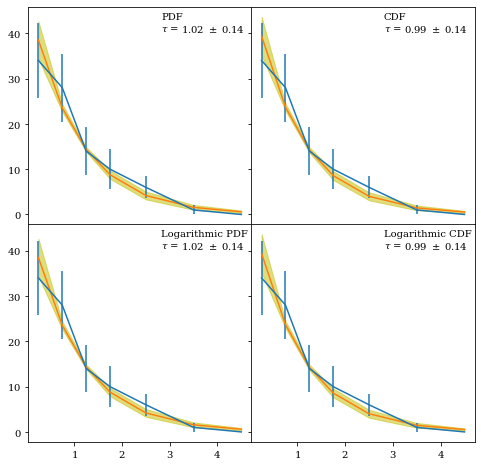

In [20]:
from scipy.stats import expon
from matplotlib.pyplot import subplots 

fig, ax = subplots(ncols=2,nrows=2,sharey=True,sharex=True,
                   gridspec_kw=dict(wspace=0,hspace=0),
                   figsize=(8,8))

def gg(x,tau):
    return s*expon.pdf(x,scale=tau)
    
for f,c,l,a in zip([expon.pdf, expon.cdf, expon.logpdf, expon.logcdf],
                   [False,     True,      False,        True],
                   [False,     False,     True,         True],
                   ax.ravel()):
    
    ff        = lambda t,tau : f(t,scale=tau)
    p,cov,opt = mle_fit(ff,(b,h[0]),(1),full_output=True,logpdf=l,cdf=c)
    
    tit = f'{"Logarithmic " if l else ""}{"CDF" if c else "PDF"}'
    plot_fit(h[1],h[0],h[3],gg, p, cov,ax=a,nsig=2,tbl_kw={'title':tit},
             chi2=False,pvalue=False,parameters=[r'\tau'])

As shown above, if our histogram is _normalised_, then we need to pass in $N$ as it cannot be calculated from the binned data.  Let us do the same as above, but this time with a normalised histogram.  First, we generate our histogram.

Hvis vores histogram er _normaliseret_, er vi nødt til at videregive $N$, som vist ovenfor, da det ikke kan beregnes ud fra de data. Lad os gøre det samme som ovenfor, men denne gang med et normaliseret histogram. Først genererer vi vores histogram.

In [21]:
h = histogram(t,b,normalize=True)

Note, we do not need to keep track of the number of samples in this case, but we _do_ need to pass total normalisation (sample size) to our MLE function.  Let us do the four estimates as a above 

Bemærk, vi behøver ikke at holde styr på antallet af prøver i dette tilfælde, men vi _skal_ overføre den total normalisering (prøve størrelsen) til vores MLE-funktion. Lad os gøre de fire skøn som ovenfor

Same fitting as above, except the histogram is normalized, which means we need to pass the total sample size. 

Samme tilpasning som ovenfor, undtagen histogrammet er normaliseret, hvilket betyder, at vi er nødt til at give den samlede prøvestørrelse.

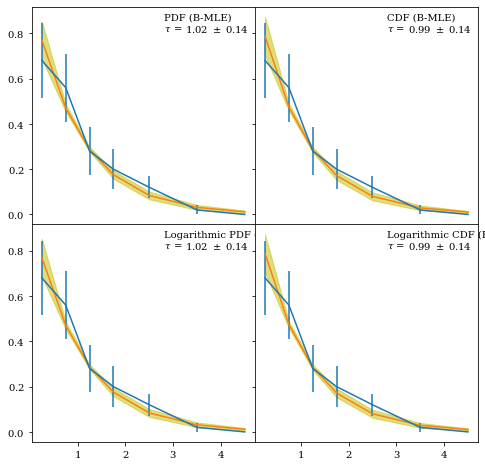

In [22]:
fig, ax = subplots(ncols=2,nrows=2,sharey=True,sharex=True,
                   gridspec_kw=dict(wspace=0,hspace=0),
                   figsize=(8,8))

n, s = s, 1
for f,c,l,a in zip([expon.pdf, expon.cdf, expon.logpdf, expon.logcdf],
                   [False,     True,      False,        True],
                   [False,     False,     True,         True],
                   ax.ravel()):
    
    ff        = lambda t,tau : f(t,scale=tau)
    p,cov,opt = mle_fit(ff,(b,h[0]),(1),full_output=True,logpdf=l,cdf=c,density=len(t))
    
    tit = f'{"Logarithmic " if l else ""}{"CDF" if c else "PDF"} (B-MLE)'
    plot_fit(h[1],h[0],h[3],gg, p, cov,ax=a,nsig=2,tbl_kw={'title':tit},
             chi2=False,pvalue=False,parameters=[r'\tau'])

Let us also do the same fits but assuming Poisson statistics. 

Lad os også gøre det samme, hvor vi antager Poisson statistik.

Assuming Poisson statistics. 

Forudsat Poisson-statistik.

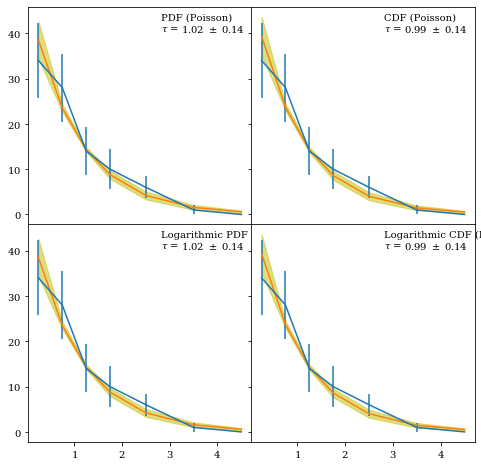

In [23]:
fig, ax = subplots(ncols=2,nrows=2,sharey=True,sharex=True,
                   gridspec_kw=dict(wspace=0,hspace=0),
                   figsize=(8,8))

h = histogram(t,b,normalize=False)
s = len(t)

for f,c,l,a in zip([expon.pdf, expon.cdf, expon.logpdf, expon.logcdf],
                   [False,     True,      False,        True],
                   [False,     False,     True,         True],
                   ax.ravel()):
    
    ff        = lambda t,tau : f(t,scale=tau)
    p,cov,opt = mle_fit(ff,(b,h[0]),(1),full_output=True,logpdf=l,cdf=c,poisson=True)
    
    tit = f'{"Logarithmic " if l else ""}{"CDF" if c else "PDF"} (Poisson)'
    plot_fit(h[1],h[0],h[3],gg, p, cov,ax=a,nsig=2,tbl_kw={'title':tit},
             chi2=None,pvalue=False,parameters=[r'\tau'])

Let us finally compare this to a regular maximum likelihood estimate working directly on the sample

Til sidst sammenligner vi dette med et almindeligt estimat for maksimal sandsynlighed direkte fra prøven

Regular MLE fit to data.

Almindelig MLE-tilpasning til data.

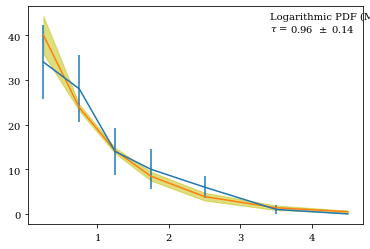

In [24]:
f      = lambda t, tau : expon.logpdf(t,scale=tau)
g      = lambda t, tau : s * expon.pdf(t,scale=tau)
p, cov = mle_fit(f,t,(1),logpdf=True)
s      = len(t)
plot_fit(h[1],h[0],h[3],g, p, cov, nsig=2, tbl_kw={'title':'Logarithmic PDF (MLE)'},
         chi2=False,pvalue=False,parameters=[r'\tau']);

In the regular MLE we find $\tau=0.96\pm0.14$ while in the binned MLE we find $1.02\pm0.14$ and $0.99\pm0.14$.  All of these results are consistent with each other and the known input of $\tau=1$.  What is more, we see that the uncertainties are all comparable. 

I den almindelige MLE finder vi $\tau=0.96\pm0.14$, mens vi i MLE i bøtter finder vi $1.02\pm0.14$ og $0.99\pm0.14$. Alle disse resultater er i overensstemmelse med hinanden og den kendte $\tau=1$. Desuden ser vi, at usikkerheden alle er sammenlignelige.

## Remarks on limit of binned MLE 

## Bemærkninger om grænsen af binned MLE

Above, we saw that the binned likelihood is given by 

Ovenfor så vi, at den sandsynlighed  fra bøtter er givet ved

In [25]:
Eq(Lntq,Ltq)

Eq(Lcal_B^m(y, thetahat), gamma(N + 1)*Product(Phi(i, thetahat)**(N*Delta[i]*y[i]), (i, 1, m))/Product(gamma(N*Delta[i]*y[i] + 1), (i, 1, m)))

and 

og

In [26]:
Eq(ellntq,elltq)

Eq(ell_B^m(y, thetahat), log(gamma(N + 1)) + Sum(N*log(Phi(i, thetahat))*Delta[i]*y[i], (i, 1, m)) + Sum(-log(gamma(N*Delta[i]*y[i] + 1)), (i, 1, m)))

where 

hvor

In [27]:
f = Function('f')
b = IndexedBase('b')
Eq(Phi(i,thetahat),Integral(f(x,thetahat),(x,b[i],b[i+1])))

Eq(Phi(i, thetahat), Integral(f(x, thetahat), (x, b[i], b[i + 1])))

If we let $\Delta_i\rightarrow 0$, so that $N\Delta_iy_i$ is reasonable unity or zero, then (ignoring zero observations so that $m\rightarrow N$) we find 

Hvis vi lader $\Delta_i\rightarrow 0$, så at $N\Delta_iy_i$ med rimelig er en eller nul, så (hvor vi ignorere nul observationer, sådan at $m\rightarrow N$) finder vi

In [28]:
from sympy import Limit
z = symbols('z',real=True)
limLntq = Ltq.simplify().replace(N*Delta[i]*y[i],z).replace(z,1).replace(m,N)
Eq(Limit(Lntq,Delta[i],0),limLntq)

Eq(Limit(Lcal_B^m(y, thetahat), Delta[i], 0), gamma(N + 1)*Product(Phi(i, thetahat), (i, 1, N))/Product(1, (i, 1, N)))

On the other hand, we have that 

$$\Phi(i,\hat\theta)\xrightarrow{\Delta_i\rightarrow 0}f(x_i;\hat\theta)\quad,$$ 

because the integral becomes a $\delta$-function where we have observations.  If substitute this in, we find 

På den anden side har vi at

$$\Phi(i,\hat\theta)\xrightarrow{\Delta_i\rightarrow 0}f(x_i;\hat\theta)\quad,$$

fordi integralen bliver en $\delta$ funktion, der hvor vi har observationer. Hvis det erstattes det ind, finder vi

In [29]:
x = IndexedBase('x')
Eq(Limit(Lntq,Delta[i],0),limLntq.replace(Phi(i,thetahat),f(x[i],thetahat))
   .doit().expand())

Eq(Limit(Lcal_B^m(y, thetahat), Delta[i], 0), gamma(N + 1)*Product(f(x[i], thetahat), (i, 1, N)))

which we recognize as the regular maximum likelihood estimate for unbinned data. 

som vi genkender som det regelmæssige estimat for maksimal sandsynlighed over hele prøven.

## Summary 

We have shown how to calculate the _binned_ likelihood function as the joint probability of counts given as a multinomial distribution

## Opsummering

Vi har vist, hvordan man beregner sandsynlighedsfunktionen af data i bøtter som den fælles sandsynlighed for tællinger givet ved en multinomial fordeling

$$\mathcal{L}_B{\left(n,\hat{\theta} \right)} = \frac{\Gamma(N+1)\prod_{i=1}^{m} \Phi^{{n}_{i}}{\left(i,\hat{\theta} \right)}}{\prod_{i=1}^{m} \Gamma({n}_{i}+1)}\quad,$$

and the logarithmic binned likelihood as 

og den logaritmisk sandsynlighed for data i bøtter er

\begin{align*}
\ell_B\left(n,\hat{\theta} \right)
&=  \sum_{i=1}^m n_i\log\Phi\left(i,\hat\theta \right) 
   - \sum_{i=1}^{m} \log\Gamma(n_i+1)
   + \begin{cases} 
       \log\Gamma(N+1) & \text{multinominal}\\
       - \sum_{i=1}^{m}\Phi(i,\hat\theta) & \text{Poisson}
     \end{cases}
  \\
&= \sum_{i=1}^{m} {n}_{i}\log\Phi{\left(i,\hat{\theta} \right)} + C_{n,B}
    + \begin{cases} 
       C_{N,B} & \text{multinominal}\\
       C_{\Phi,B} & \text{Poisson}
   \end{cases}
\quad,
\end{align*}

with 

med

\begin{align*}
  C_{N,B}    &= \log\Gamma(N+1)\\
  C_{n,B}    &= - \sum_{i=1}^{m} \log\Gamma(n_1+1)\\
  C_{\Phi,B} &= - \sum_{i=1}^{m}\Phi(i,\hat\theta)
  \quad,
\end{align*}

where 

hvor

$$\Phi{\left(i,\hat{\theta} \right)} = \int\limits_{{b}_{i}}^{{b}_{i + 1}} f{\left(x,\hat{\theta} \right)}\, dx = F{\left({b}_{i + 1},\hat{\theta} \right)} - F{\left({b}_{i},\hat{\theta} \right)}\quad,$$

is the _expectation_ in bin ${}_i$ given by the PDF $f$. 

We have developed the function `binned_llh` which calculates the binned logarithmic likelihood given data and a (logarithmic) PDF or CDF.   We have also modified our `mle_fit` function to switch between a regular maximum likelihood estimate (MLE) and a binned maximum likelihood estimate (B-MLE).  We have also seen that in the limit of infinitesimal small bins that $\mathcal{L}_B\xrightarrow{\Delta_i\rightarrow 0}\mathcal{L}$. 

er _forventningen_ i bøtten ${}_i$ givet ved PDF'en $f$.

Vi har udviklet funktionen `binned_llh`, der beregner den logaritmiske sandsynlighed for givne data i bøtter og en (logaritmisk) PDF eller CDF. Vi har også ændret vores `mle fit` funktion for at skifte mellem et almindeligt estimat for maksimal sandsynlighed (MLE) og et maksimalt sandsynlighedsestimat i bøtter (B-MLE). Vi har også set, at i grænsen for uendelige små bøtter, $\mathcal{L}_B\xrightarrow{\Delta_i\rightarrow 0}\mathcal{L}$.